In [1]:
import brainbox
from one.api import ONE
from utils import download_glm_hmm, save_data_path, val_eid

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.patches as mpatches

import phate
import scprep

In [2]:
# Loading up the cleaned data
data = pd.read_pickle('data/ephys_glm_frame_data.pkl')
data.shape

(29023, 31)

In [3]:
def count_max_prob_classes(frame_predictions):
    # Find the index of the max probability in each row
    max_indices = np.argmax(frame_predictions, axis=1)
    
    # Count occurrences of each index
    counts = np.bincount(max_indices, minlength=4)
    
    # Map counts to class names
    class_names = ["still", "move", "wheel_turn", "groom"]
    count_dict = {class_names[i]: counts[i] for i in range(4)}
    
    return count_dict

In [4]:
adf = pd.DataFrame(columns=["session", "trial_idx", "glm_hmm_state_1", "glm_hmm_state_2", "glm_hmm_state_3", "still", "move", "wheel_turn", "groom"])

for sess_id in val_eid:
    # Get the data for the session
    sess_data = data[data['session'] == sess_id]
    
    # for every trial of this session, get the frame predictions
    for i in range(len(sess_data)):
        # Get the data for this trial
        trial_data = sess_data.iloc[i]
        
        # Get the frame predictions
        frame_predictions = trial_data['frame_preds']

        # Count the number of occurrences of each class
        count_dict = count_max_prob_classes(frame_predictions)

        # get the 3 state glm_hmm_state model
        glm_hmm_state_model = trial_data['glm-hmm_3']

        # store them in the dataframe
        adf = pd.concat([adf, pd.DataFrame({
            "session": [sess_id],
            "trial_idx": [i],
            "glm_hmm_state_1": [glm_hmm_state_model[0]],
            "glm_hmm_state_2": [glm_hmm_state_model[1]],
            "glm_hmm_state_3": [glm_hmm_state_model[2]],
            **count_dict
        })])

In [5]:
# GLM-HMM state as labels
labels = adf[["glm_hmm_state_1", "glm_hmm_state_2", "glm_hmm_state_3"]].idxmax(axis=1)

In [7]:
adf

session trial_idx  glm_hmm_state_1  \
0   db4df448-e449-4a6f-a0e7-288711e7a75a         0     3.585359e-11   
0   db4df448-e449-4a6f-a0e7-288711e7a75a         1     1.557519e-04   
0   db4df448-e449-4a6f-a0e7-288711e7a75a         2     7.079793e-04   
0   db4df448-e449-4a6f-a0e7-288711e7a75a         3     1.196416e-03   
0   db4df448-e449-4a6f-a0e7-288711e7a75a         4     1.675768e-03   
..                                   ...       ...              ...   
0   3e6a97d3-3991-49e2-b346-6948cb4580fb       520     6.669030e-01   
0   3e6a97d3-3991-49e2-b346-6948cb4580fb       521     6.197505e-01   
0   3e6a97d3-3991-49e2-b346-6948cb4580fb       522     7.263608e-01   
0   3e6a97d3-3991-49e2-b346-6948cb4580fb       523     7.388124e-01   
0   3e6a97d3-3991-49e2-b346-6948cb4580fb       524     6.942724e-01   

    glm_hmm_state_2  glm_hmm_state_3 still move wheel_turn groom  
0          0.985644         0.014356  1151  279        948     0  
0          0.990954         0.008890   261   31        145     0  
0          0.995434         0.003858   140    0        108     0  
0          0.996150         0.002653    76   55         84     0  
0          0.995913         0.002411    86    0        116     0  
..              ...              ...   ...  ...        ...   ...  
0          0.332919         0.000178    88  102        179     0  
0          0.379749         0.000501  1823   56        383    15  
0          0.273305         0.000334   451   22         88     0  
0          0.260548         0.000640  1288   22         18     0  
0          0.303384         0.002343   462    0          0     0  

[29023 rows x 9 columns]

/tmp/ipykernel_8040/825893818.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['total_count'] = session_data[behaviors].sum(axis=1)


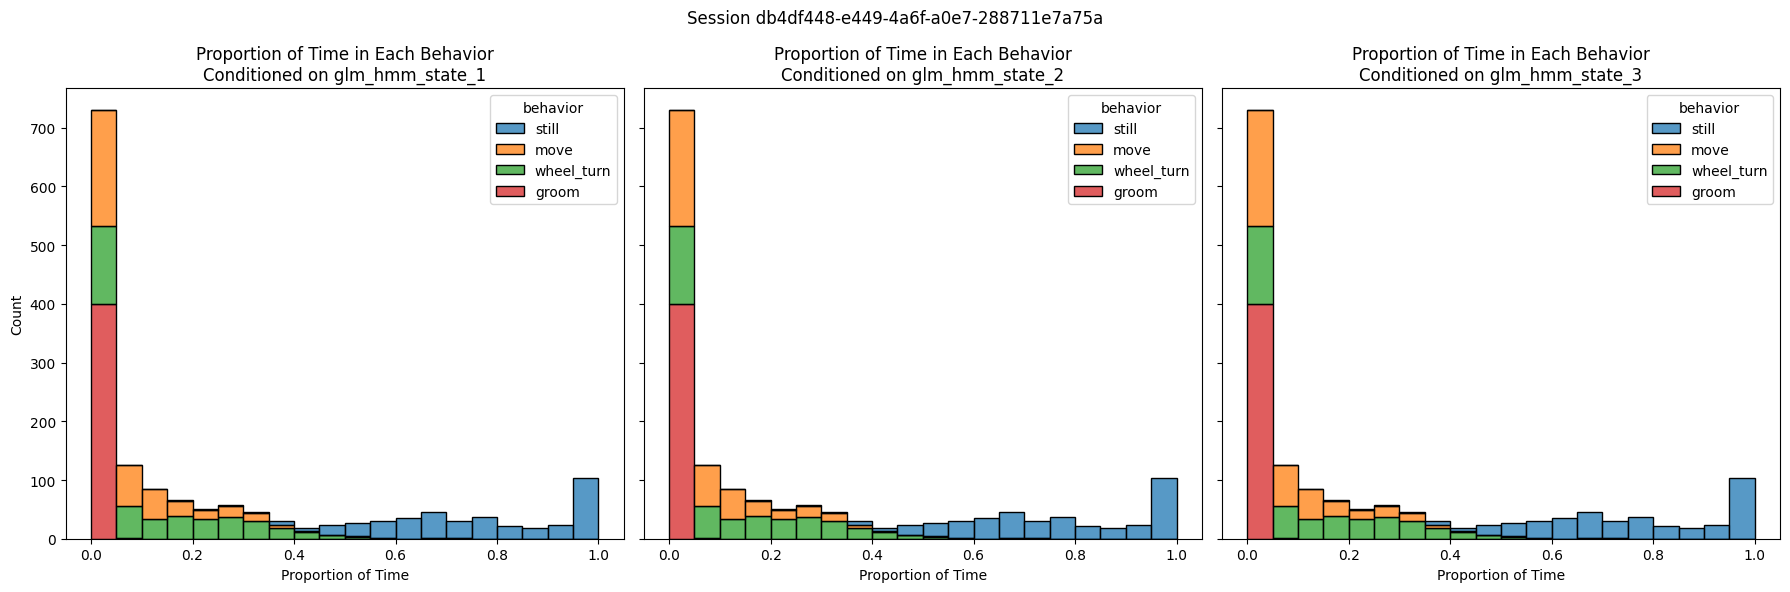

/tmp/ipykernel_8040/825893818.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['total_count'] = session_data[behaviors].sum(axis=1)


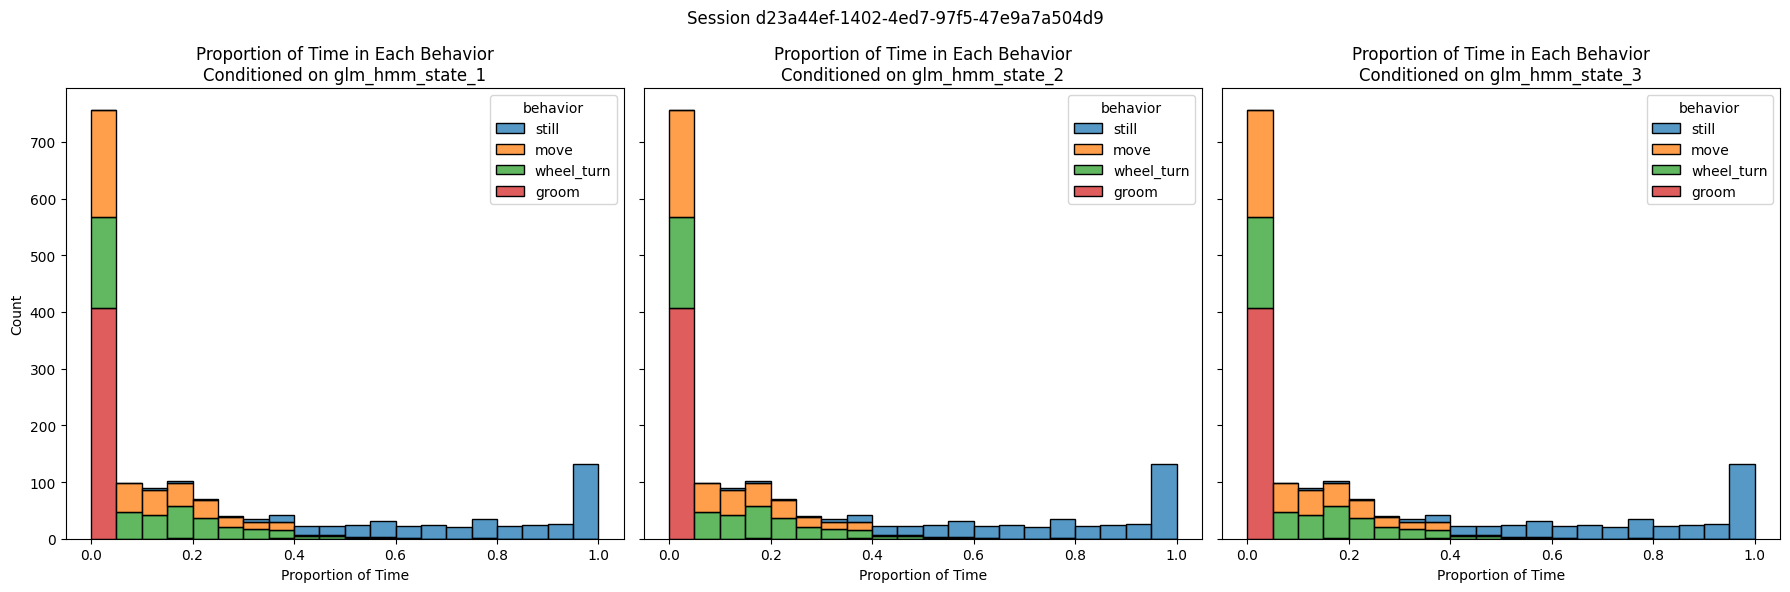

/tmp/ipykernel_8040/825893818.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['total_count'] = session_data[behaviors].sum(axis=1)


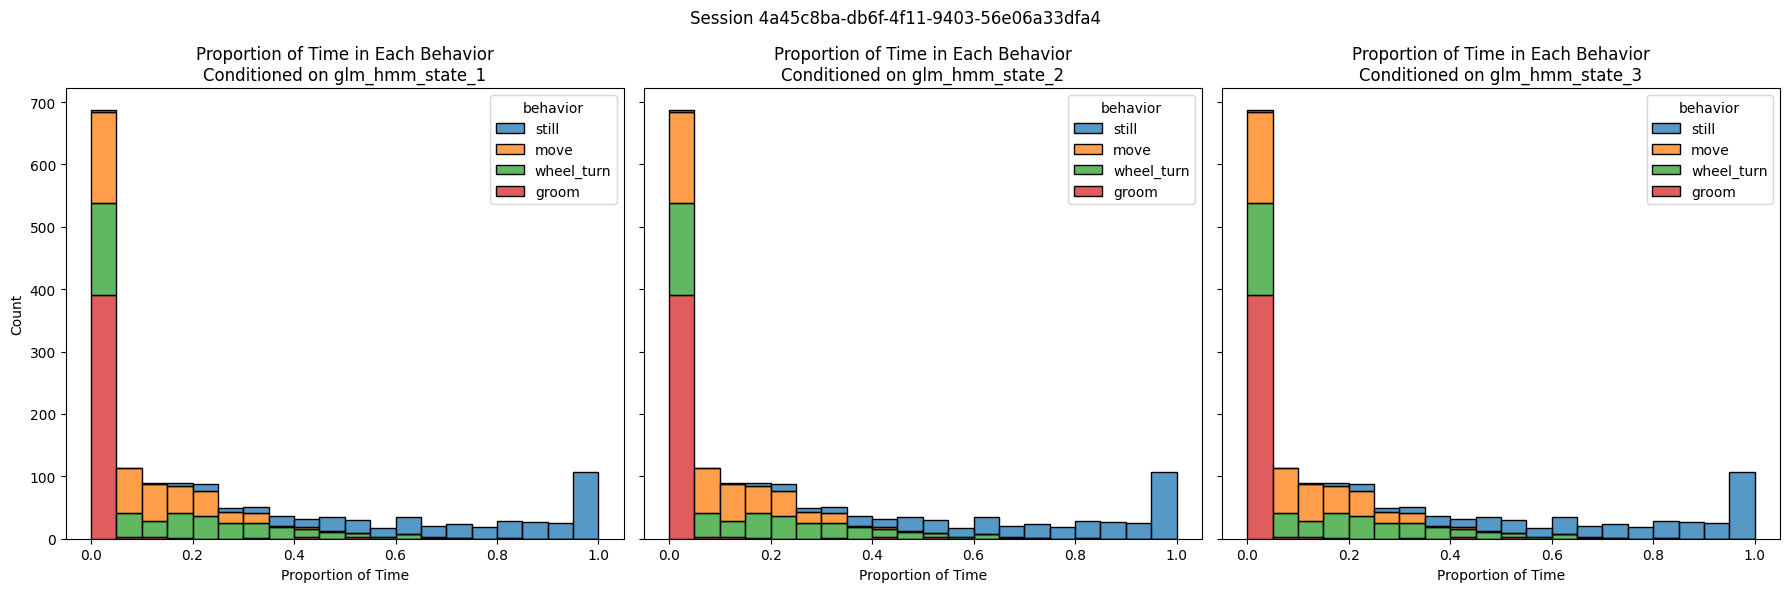

/tmp/ipykernel_8040/825893818.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['total_count'] = session_data[behaviors].sum(axis=1)


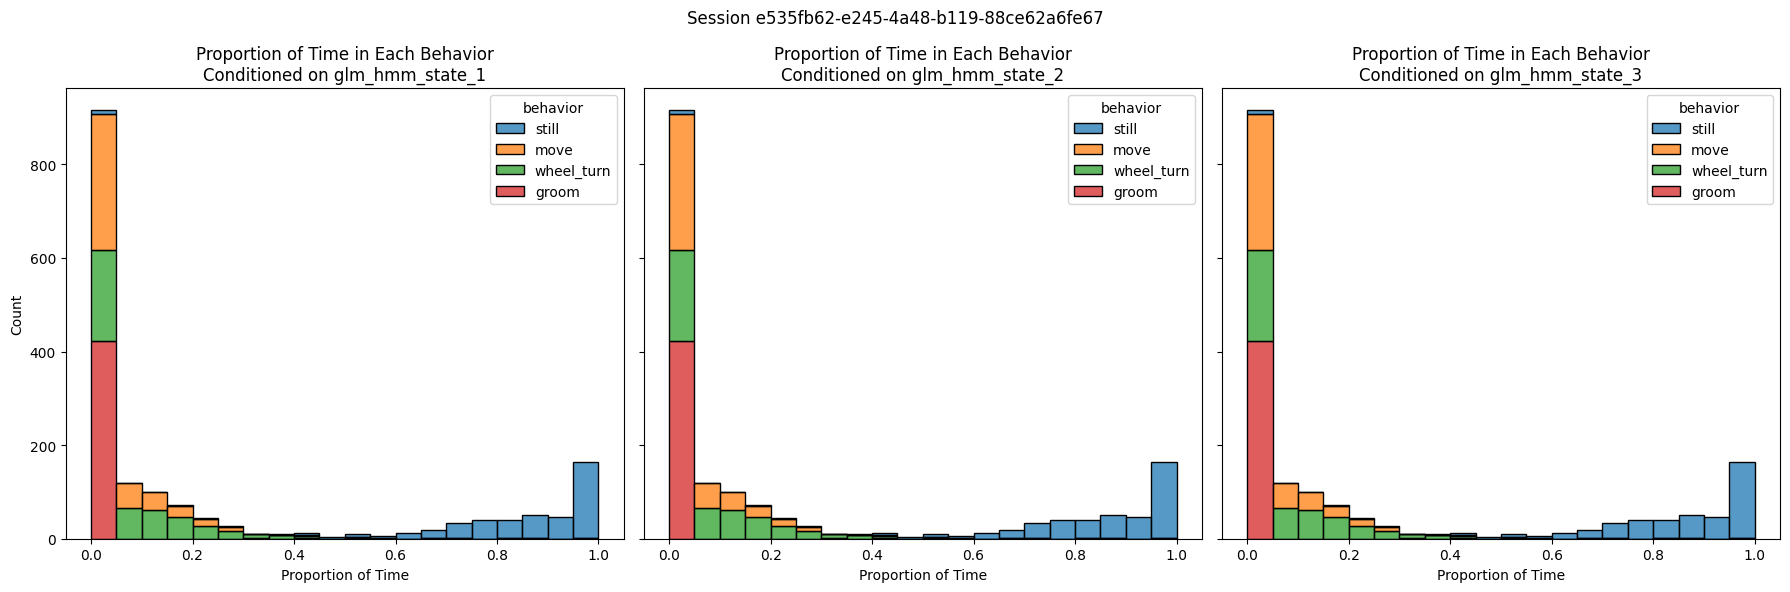

/tmp/ipykernel_8040/825893818.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['total_count'] = session_data[behaviors].sum(axis=1)


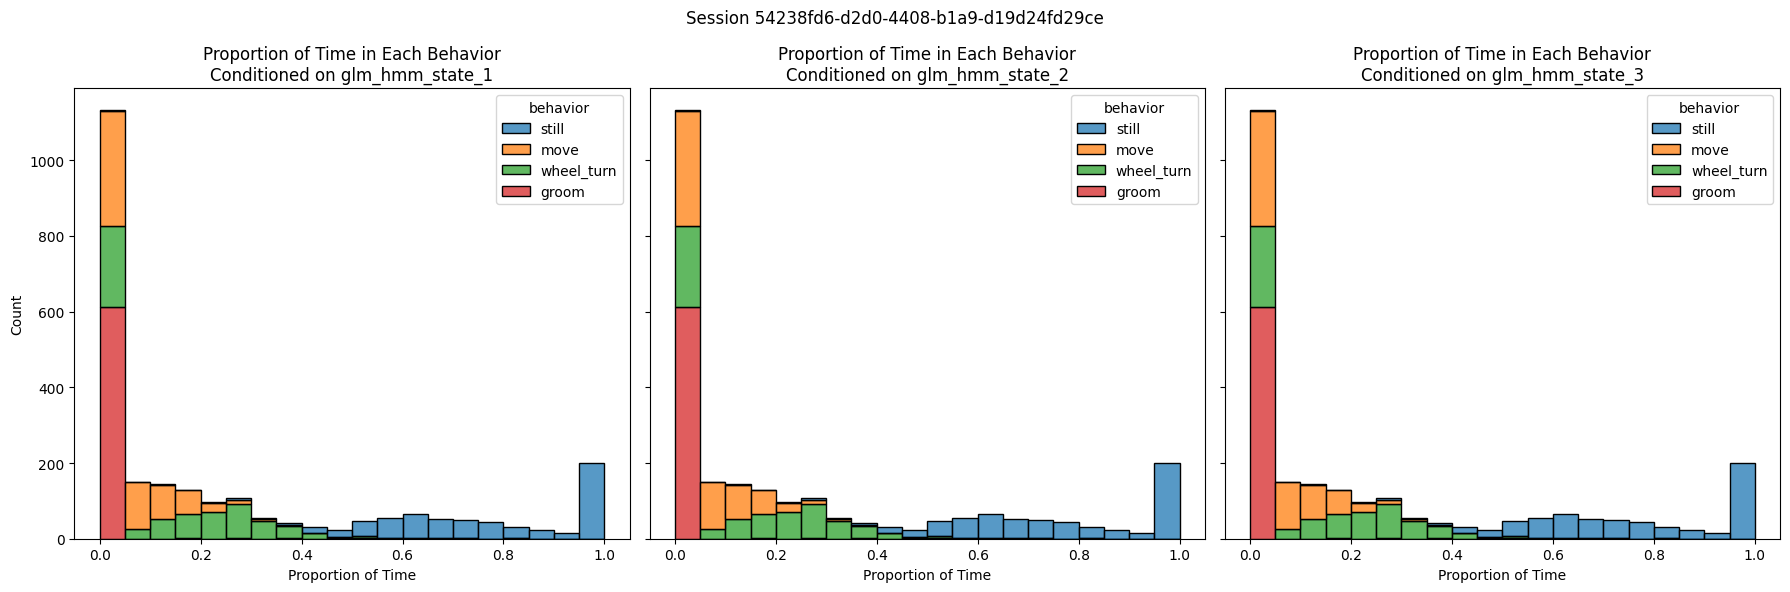

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data by a single session
# session_id = 'db4df448-e449-4a6f-a0e7-288711e7a75a'  # example session ID

for session_id in val_eid[:5]:
    session_data = adf[adf['session'] == session_id]

    # Calculate proportions
    states = ['glm_hmm_state_1', 'glm_hmm_state_2', 'glm_hmm_state_3']
    behaviors = ['still', 'move', 'wheel_turn', 'groom']
    session_data['total_count'] = session_data[behaviors].sum(axis=1)

    # Prepare data for plotting
    plot_data = []
    for state in states:
        for behavior in behaviors:
            proportion = session_data[behavior] / session_data['total_count']
            plot_data.append(pd.DataFrame({
                'state': state,
                'behavior': behavior,
                'proportion': proportion,
                'glm_probability': session_data[state]
            }))
    plot_df = pd.concat(plot_data)

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    for idx, state in enumerate(states):
        sns.histplot(
            data=plot_df[plot_df['state'] == state],
            x='proportion',
            hue='behavior',
            multiple='stack',
            bins=20,
            ax=axes[idx]
        )
        axes[idx].set_title(f'Proportion of Time in Each Behavior\nConditioned on {state}')
        axes[idx].set_xlabel('Proportion of Time')
        axes[idx].set_ylabel('Count')
    
    plt.suptitle(f'Session {session_id}')

    plt.tight_layout()
    plt.show()


In [15]:
plot_data

most_likely_state          behavior proportion
0      glm_hmm_state_2  still_proportion    0.48402
1      glm_hmm_state_2  still_proportion   0.597254
2      glm_hmm_state_2  still_proportion   0.564516
3      glm_hmm_state_2  still_proportion   0.353488
4      glm_hmm_state_2  still_proportion   0.425743
...                ...               ...        ...
1603   glm_hmm_state_2  groom_proportion        0.0
1604   glm_hmm_state_2  groom_proportion        0.0
1605   glm_hmm_state_2  groom_proportion        0.0
1606   glm_hmm_state_2  groom_proportion        0.0
1607   glm_hmm_state_2  groom_proportion        0.0

[1608 rows x 3 columns]

/tmp/ipykernel_8040/1043701830.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['most_likely_state'] = session_data[glm_states].idxmax(axis=1)
/tmp/ipykernel_8040/1043701830.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['total_count'] = session_data[behaviors].sum(axis=1)
/tmp/ipykernel_8040/1043701830.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

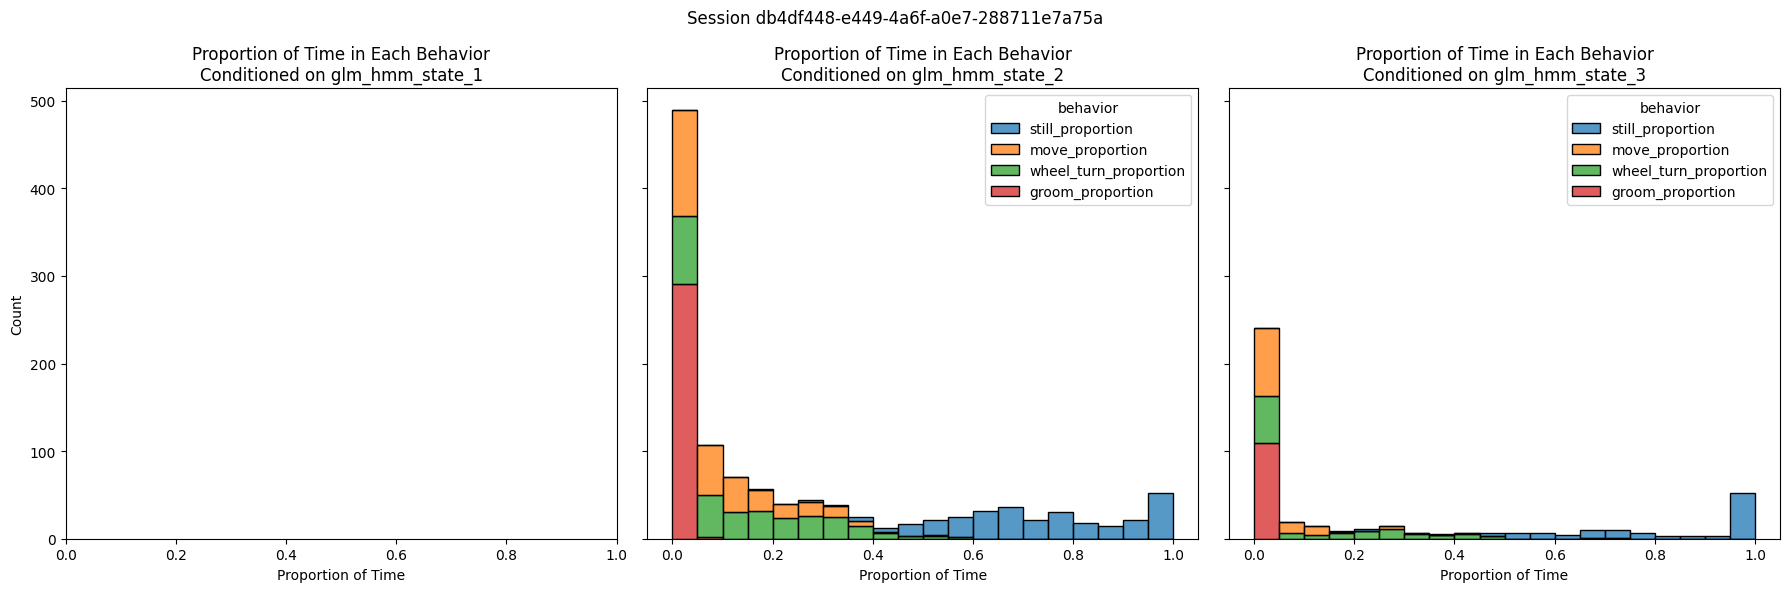

/tmp/ipykernel_8040/1043701830.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['most_likely_state'] = session_data[glm_states].idxmax(axis=1)
/tmp/ipykernel_8040/1043701830.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['total_count'] = session_data[behaviors].sum(axis=1)
/tmp/ipykernel_8040/1043701830.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

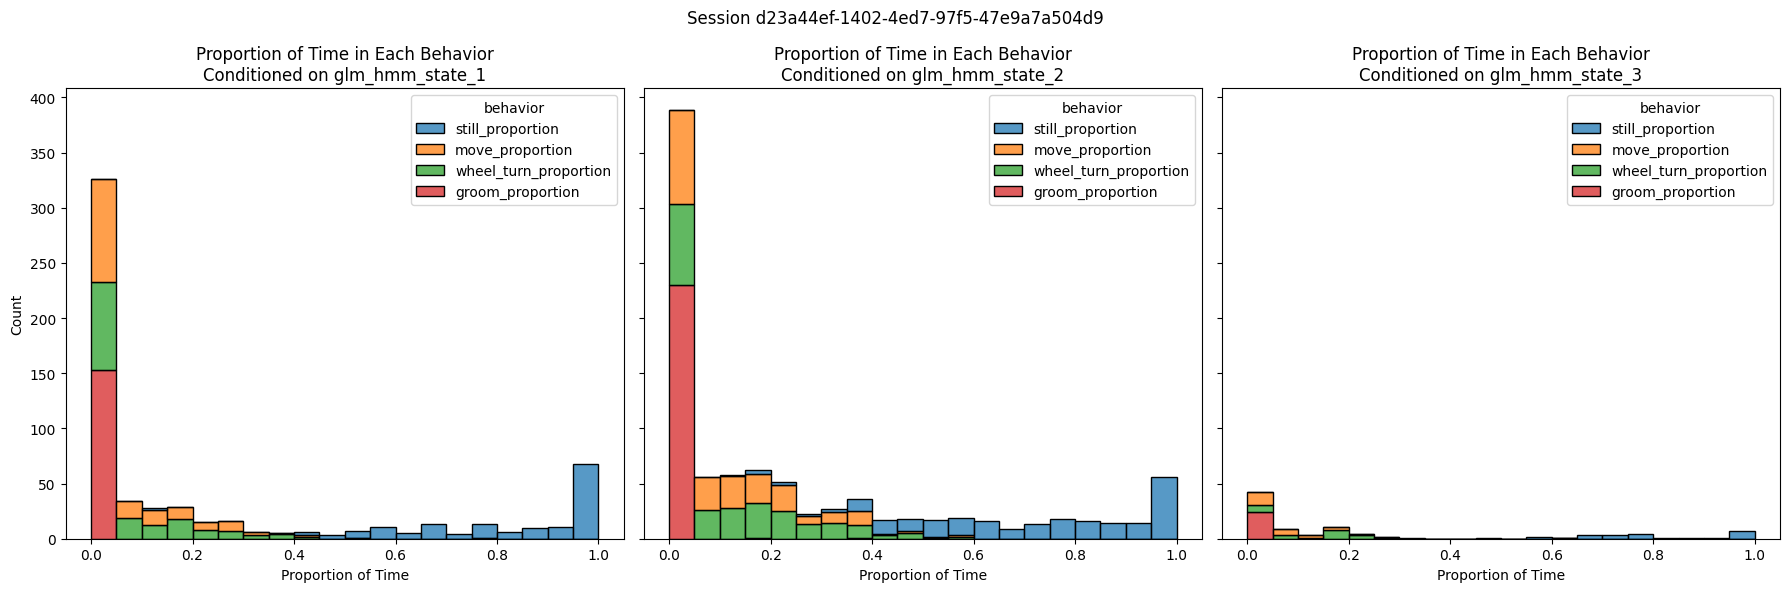

/tmp/ipykernel_8040/1043701830.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['most_likely_state'] = session_data[glm_states].idxmax(axis=1)
/tmp/ipykernel_8040/1043701830.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['total_count'] = session_data[behaviors].sum(axis=1)
/tmp/ipykernel_8040/1043701830.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

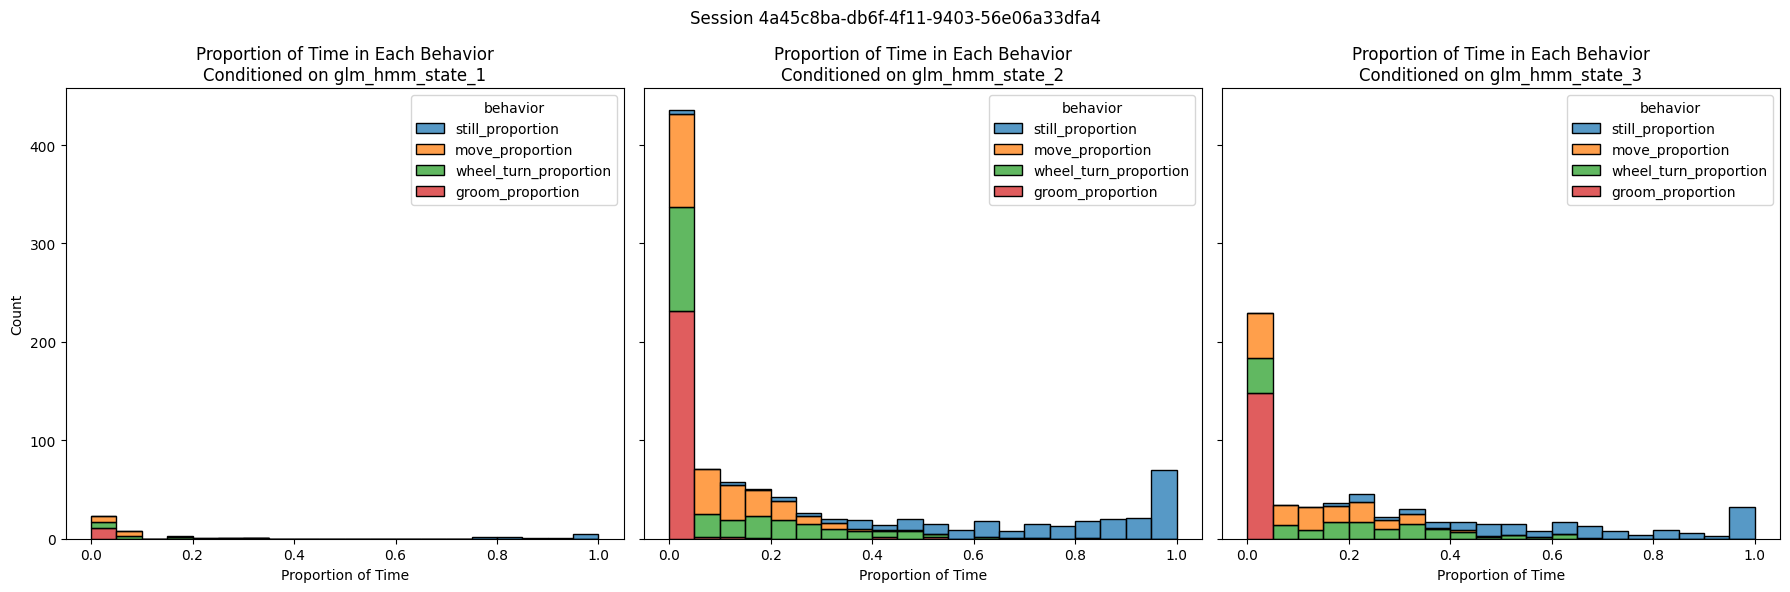

/tmp/ipykernel_8040/1043701830.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['most_likely_state'] = session_data[glm_states].idxmax(axis=1)
/tmp/ipykernel_8040/1043701830.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['total_count'] = session_data[behaviors].sum(axis=1)
/tmp/ipykernel_8040/1043701830.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

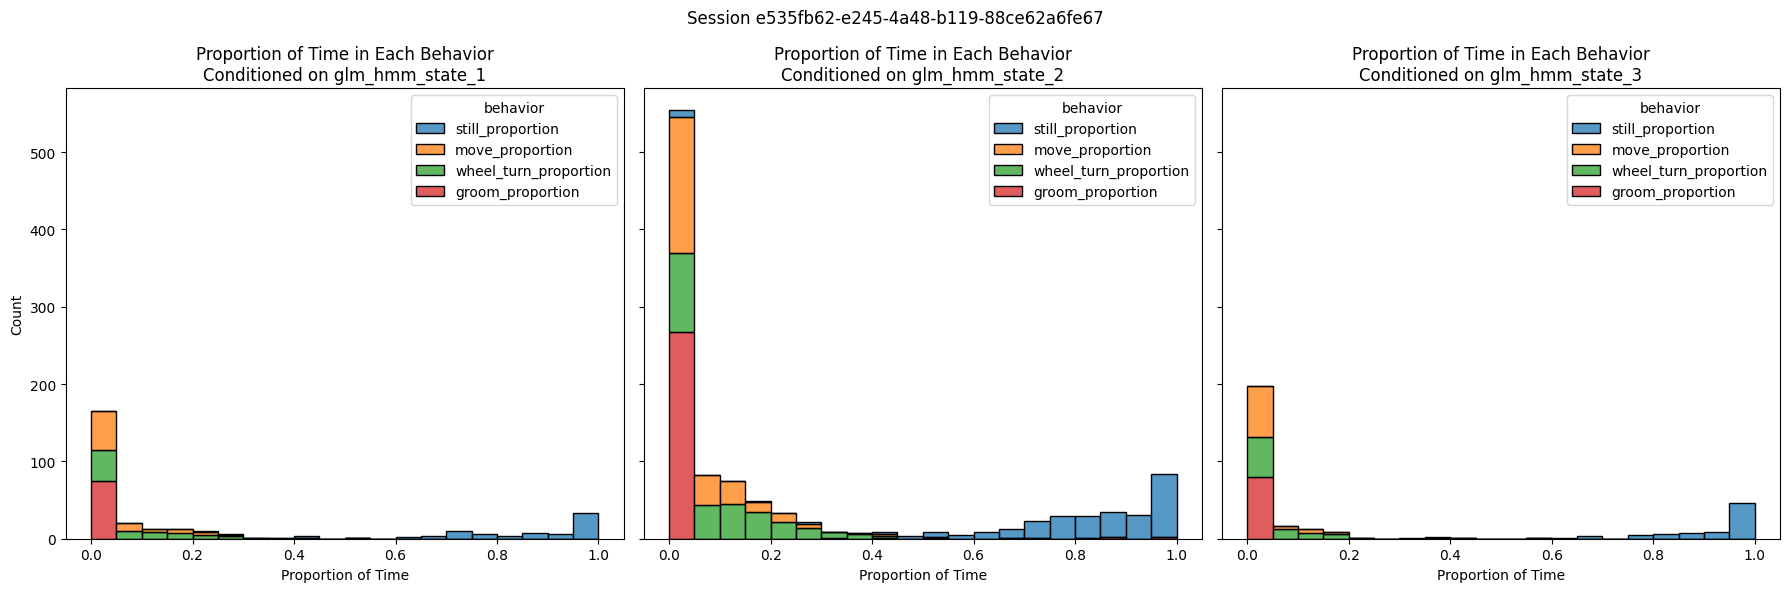

/tmp/ipykernel_8040/1043701830.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['most_likely_state'] = session_data[glm_states].idxmax(axis=1)
/tmp/ipykernel_8040/1043701830.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['total_count'] = session_data[behaviors].sum(axis=1)
/tmp/ipykernel_8040/1043701830.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

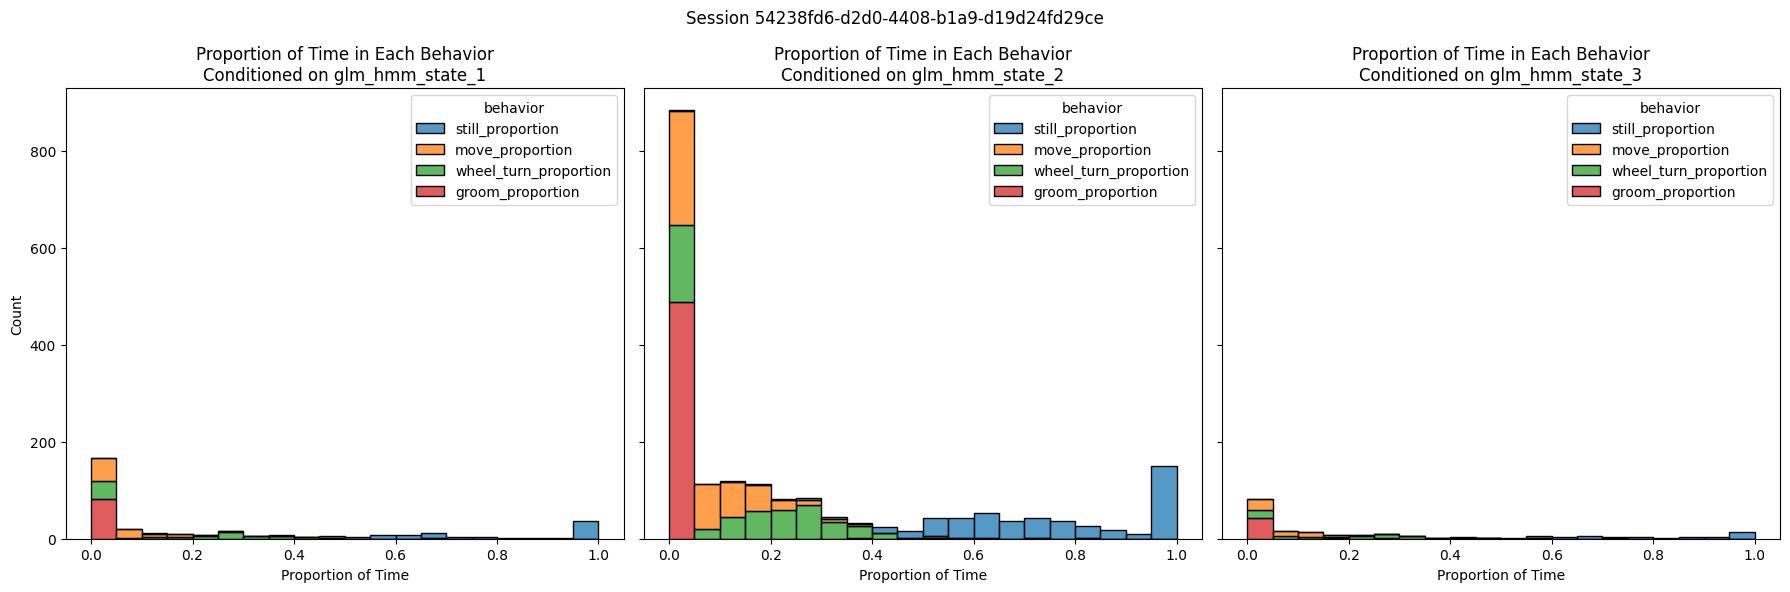

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data by a single session
# session_id = 'db4df448-e449-4a6f-a0e7-288711e7a75a'  # example session ID4
for session_id in val_eid[:5]:
    session_data = adf[adf['session'] == session_id]

    # Determine the most likely GLM-HMM state for each trial
    glm_states = ['glm_hmm_state_1', 'glm_hmm_state_2', 'glm_hmm_state_3']
    session_data['most_likely_state'] = session_data[glm_states].idxmax(axis=1)

    # Calculate proportions
    behaviors = ['still', 'move', 'wheel_turn', 'groom']
    session_data['total_count'] = session_data[behaviors].sum(axis=1)
    for behavior in behaviors:
        session_data[f'{behavior}_proportion'] = session_data[behavior] / session_data['total_count']

    # Prepare data for plotting
    plot_data = session_data.melt(
        id_vars=['most_likely_state'],
        value_vars=[f'{behavior}_proportion' for behavior in behaviors],
        var_name='behavior',
        value_name='proportion'
    )

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    for idx, state in enumerate(glm_states):
        state_label = f'glm_hmm_state_{idx+1}'
        try:
            sns.histplot(
                data=plot_data[plot_data['most_likely_state'] == state_label],
                x='proportion',
                hue='behavior',
                multiple='stack',
                bins=20,
                ax=axes[idx]
            )
            axes[idx].set_title(f'Proportion of Time in Each Behavior\nConditioned on {state_label}')
            axes[idx].set_xlabel('Proportion of Time')
            axes[idx].set_ylabel('Count')

        except:
            pass
        # sns.histplot(
        #     data=plot_data[plot_data['most_likely_state'] == state_label],
        #     x='proportion',
        #     hue='behavior',
        #     multiple='stack',
        #     bins=20,
        #     ax=axes[idx]
        # )

        axes[idx].set_title(f'Proportion of Time in Each Behavior\nConditioned on {state_label}')
        axes[idx].set_xlabel('Proportion of Time')
        axes[idx].set_ylabel('Count')

    plt.suptitle(f'Session {session_id}')
    plt.tight_layout()
    plt.show()


In [9]:
session_data

session trial_idx  glm_hmm_state_1  \
0   db4df448-e449-4a6f-a0e7-288711e7a75a         0     3.585359e-11   
0   db4df448-e449-4a6f-a0e7-288711e7a75a         1     1.557519e-04   
0   db4df448-e449-4a6f-a0e7-288711e7a75a         2     7.079793e-04   
0   db4df448-e449-4a6f-a0e7-288711e7a75a         3     1.196416e-03   
0   db4df448-e449-4a6f-a0e7-288711e7a75a         4     1.675768e-03   
..                                   ...       ...              ...   
0   db4df448-e449-4a6f-a0e7-288711e7a75a       397     3.265771e-01   
0   db4df448-e449-4a6f-a0e7-288711e7a75a       398     3.273355e-01   
0   db4df448-e449-4a6f-a0e7-288711e7a75a       399     3.306436e-01   
0   db4df448-e449-4a6f-a0e7-288711e7a75a       400     3.304616e-01   
0   db4df448-e449-4a6f-a0e7-288711e7a75a       401     3.290335e-01   

    glm_hmm_state_2  glm_hmm_state_3 still move wheel_turn groom total_count  
0          0.985644         0.014356  1151  279        948     0        2378  
0          0.990954         0.008890   261   31        145     0         437  
0          0.995434         0.003858   140    0        108     0         248  
0          0.996150         0.002653    76   55         84     0         215  
0          0.995913         0.002411    86    0        116     0         202  
..              ...              ...   ...  ...        ...   ...         ...  
0          0.573789         0.099634   721   56         49     0         826  
0          0.571942         0.100722  2848  317        372     0        3537  
0          0.599785         0.069571   339    0          0     0         339  
0          0.608909         0.060629  1815  173        276     0        2264  
0          0.611876         0.059090  1938   68        102     0        2108  

[402 rows x 10 columns]

In [6]:
# group the dataframe by session and only select the first 401 trials
adf_grouped = adf.groupby("session")
adf_grouped = adf_grouped.head(401)

In [7]:
adf_grouped_orginal = adf_grouped.copy()

In [8]:
# now average the values across the sessions
adf_grouped = adf_grouped[["trial_idx","glm_hmm_state_1", "glm_hmm_state_2", "glm_hmm_state_3", "still", "move", "wheel_turn", "groom"]].groupby("trial_idx").mean()

In [9]:
adf_grouped

glm_hmm_state_1  glm_hmm_state_2  glm_hmm_state_3   still    move  \
trial_idx                                                                      
0                 0.198685         0.573640         0.227675  496.08  133.82   
1                 0.242433         0.462280         0.295287  329.46   80.76   
2                 0.249371         0.436824         0.313805  259.44   78.96   
3                 0.279167         0.373805         0.347028  263.02    74.5   
4                 0.284350         0.375086         0.340564  211.04   62.62   
...                    ...              ...              ...     ...     ...   
396               0.318314         0.346787         0.334898  564.84    45.9   
397               0.333322         0.343719         0.322959  478.22   36.36   
398               0.343654         0.332322         0.324024  560.58   31.44   
399               0.346985         0.330839         0.322176  450.88   34.98   
400               0.339089         0.335522         0.325389  558.14   46.18   

          wheel_turn  groom  
trial_idx                    
0             230.74  11.08  
1              147.7   0.68  
2             114.92   6.14  
3              95.24    0.5  
4              87.56    0.0  
...              ...    ...  
396            53.76   1.52  
397            57.94   4.36  
398             59.9   3.94  
399            61.66   1.58  
400            64.22   15.0  

[401 rows x 7 columns]

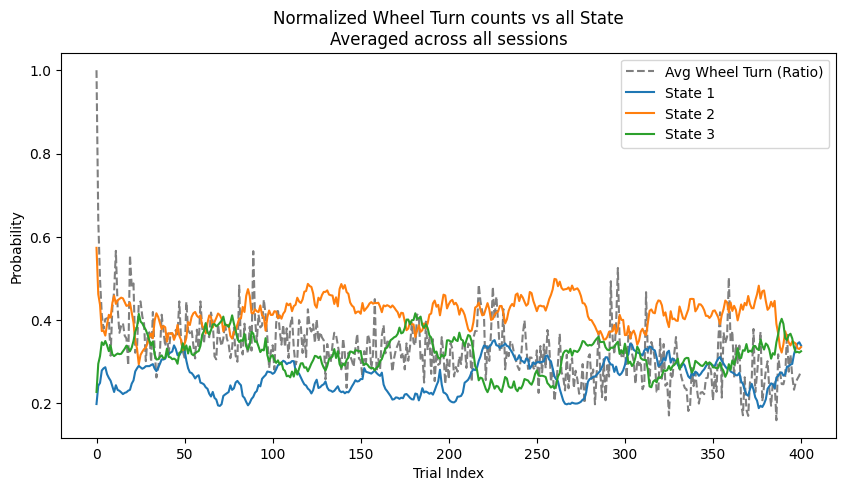

In [10]:
# plot wheel turn and state 3
plt.figure(figsize=(10,5))
plt.plot(adf_grouped["wheel_turn"]/adf_grouped["wheel_turn"].max(), "--k", label="Avg Wheel Turn (Ratio)", alpha=0.5)
plt.plot(adf_grouped["glm_hmm_state_1"], label="State 1")
plt.plot(adf_grouped["glm_hmm_state_2"], label="State 2")
plt.plot(adf_grouped["glm_hmm_state_3"], label="State 3")
plt.legend()
plt.xlabel("Trial Index")
plt.ylabel("Probability")
plt.title("Normalized Wheel Turn counts vs all State\nAveraged across all sessions")
plt.show()

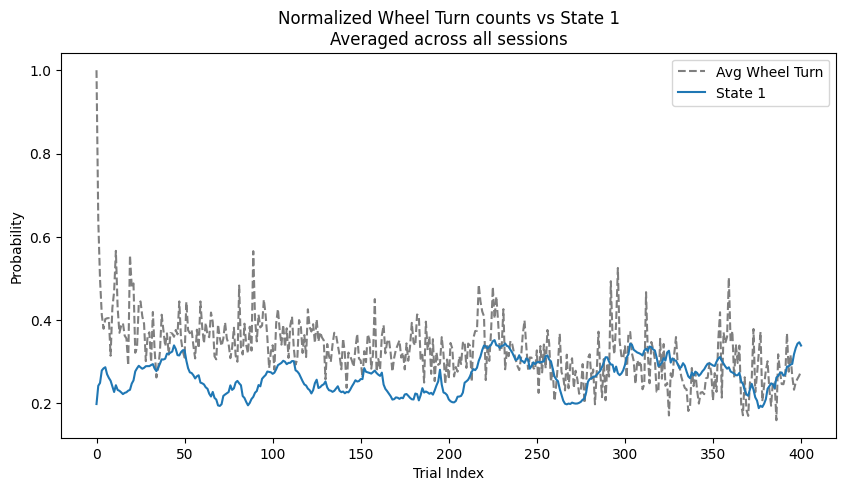

In [11]:
# plot wheel turn and state 3
plt.figure(figsize=(10,5))
plt.plot(adf_grouped["wheel_turn"]/adf_grouped["wheel_turn"].max(), "--k", label="Avg Wheel Turn",  alpha=0.5)
plt.plot(adf_grouped["glm_hmm_state_1"], label="State 1")
plt.legend()
plt.xlabel("Trial Index")
plt.ylabel("Probability")
plt.title("Normalized Wheel Turn counts vs State 1\nAveraged across all sessions")
plt.show()

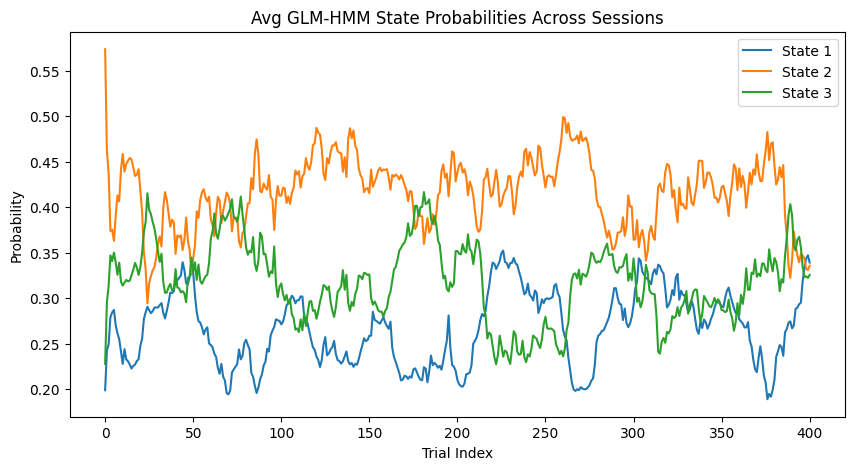

In [12]:
# plot the glm-hmm state probabilities
plt.figure(figsize=(10, 5))
adf_grouped[["glm_hmm_state_1", "glm_hmm_state_2", "glm_hmm_state_3"]].plot(ax=plt.gca())
plt.xlabel("Trial Index")
plt.ylabel("Probability")
plt.title("Avg GLM-HMM State Probabilities Across Sessions")
plt.legend(["State 1", "State 2", "State 3"])
plt.show()

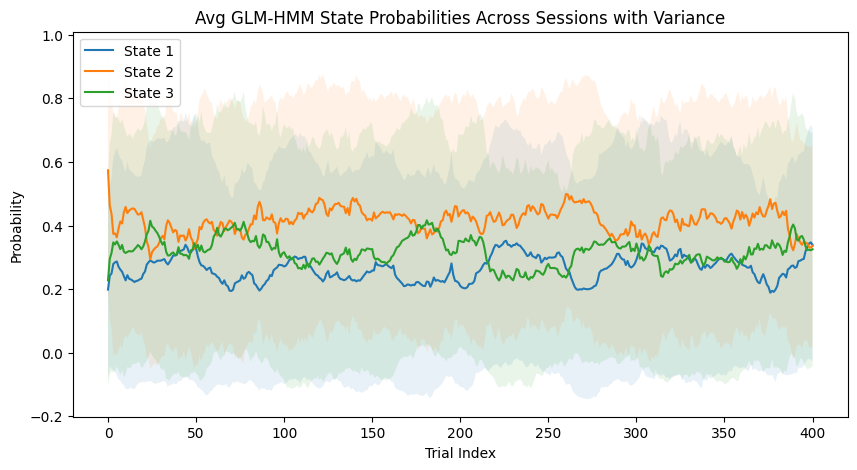

In [13]:
# same as above but do the variance with eh adf_grouped_orginal
plt.figure(figsize=(10, 5))
adf_grouped[["glm_hmm_state_1", "glm_hmm_state_2", "glm_hmm_state_3"]].plot(ax=plt.gca())

# plot the variance
plt.fill_between(adf_grouped.index, adf_grouped_orginal.groupby("trial_idx")["glm_hmm_state_1"].mean() + adf_grouped_orginal.groupby("trial_idx")["glm_hmm_state_1"].std(), adf_grouped.groupby("trial_idx")["glm_hmm_state_1"].mean() - adf_grouped_orginal.groupby("trial_idx")["glm_hmm_state_1"].std(), alpha=0.1)
plt.fill_between(adf_grouped.index, adf_grouped_orginal.groupby("trial_idx")["glm_hmm_state_2"].mean() + adf_grouped_orginal.groupby("trial_idx")["glm_hmm_state_2"].std(), adf_grouped.groupby("trial_idx")["glm_hmm_state_2"].mean() - adf_grouped_orginal.groupby("trial_idx")["glm_hmm_state_2"].std(), alpha=0.1)
plt.fill_between(adf_grouped.index, adf_grouped_orginal.groupby("trial_idx")["glm_hmm_state_3"].mean() + adf_grouped_orginal.groupby("trial_idx")["glm_hmm_state_3"].std(), adf_grouped.groupby("trial_idx")["glm_hmm_state_3"].mean() - adf_grouped_orginal.groupby("trial_idx")["glm_hmm_state_3"].std(), alpha=0.1)

plt.xlabel("Trial Index")
plt.ylabel("Probability")
plt.title("Avg GLM-HMM State Probabilities Across Sessions with Variance")
plt.legend(["State 1", "State 2", "State 3"])
plt.show()

In [14]:
adf_grouped_orginal.groupby("trial_idx")["glm_hmm_state_1"].mean() - adf_grouped_orginal.groupby("trial_idx")["glm_hmm_state_1"].std()

trial_idx
0     -0.083266
1     -0.042119
2     -0.051064
3     -0.054024
4     -0.060027
         ...   
396   -0.032263
397   -0.021608
398   -0.019943
399   -0.020444
400   -0.028457
Name: glm_hmm_state_1, Length: 401, dtype: float64

In [15]:
glm_columns = ['glm_hmm_state_1', 'glm_hmm_state_2', 'glm_hmm_state_3']
count_columns = ['still', 'move', 'wheel_turn', 'groom']

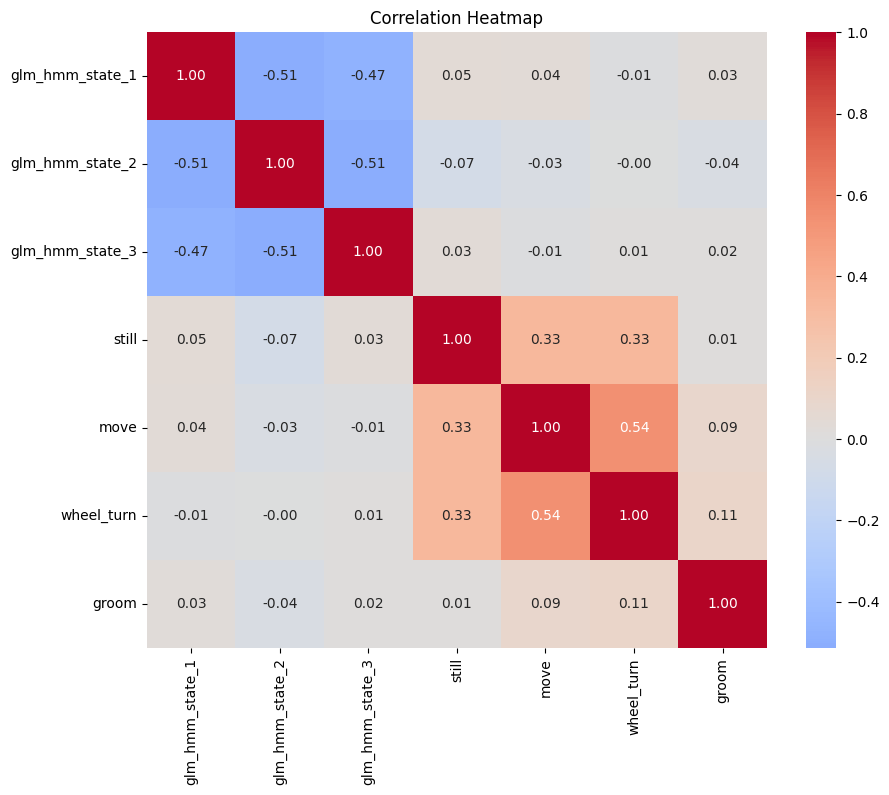

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations between glm columns and count columns
correlation_matrix = adf[glm_columns + count_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
adf[glm_columns + count_columns]

glm_hmm_state_1  glm_hmm_state_2  glm_hmm_state_3 still move wheel_turn  \
0      3.585359e-11         0.985644         0.014356  1151  279        948   
0      1.557519e-04         0.990954         0.008890   261   31        145   
0      7.079793e-04         0.995434         0.003858   140    0        108   
0      1.196416e-03         0.996150         0.002653    76   55         84   
0      1.675768e-03         0.995913         0.002411    86    0        116   
..              ...              ...              ...   ...  ...        ...   
0      6.669030e-01         0.332919         0.000178    88  102        179   
0      6.197505e-01         0.379749         0.000501  1823   56        383   
0      7.263608e-01         0.273305         0.000334   451   22         88   
0      7.388124e-01         0.260548         0.000640  1288   22         18   
0      6.942724e-01         0.303384         0.002343   462    0          0   

   groom  
0      0  
0      0  
0      0  
0      0  
0      0  
..   ...  
0      0  
0     15  
0      0  
0      0  
0      0  

[29023 rows x 7 columns]

In [29]:
from scipy.spatial import distance

distance.cosine([1, 1, 1], [1, 1, 1])

0.0

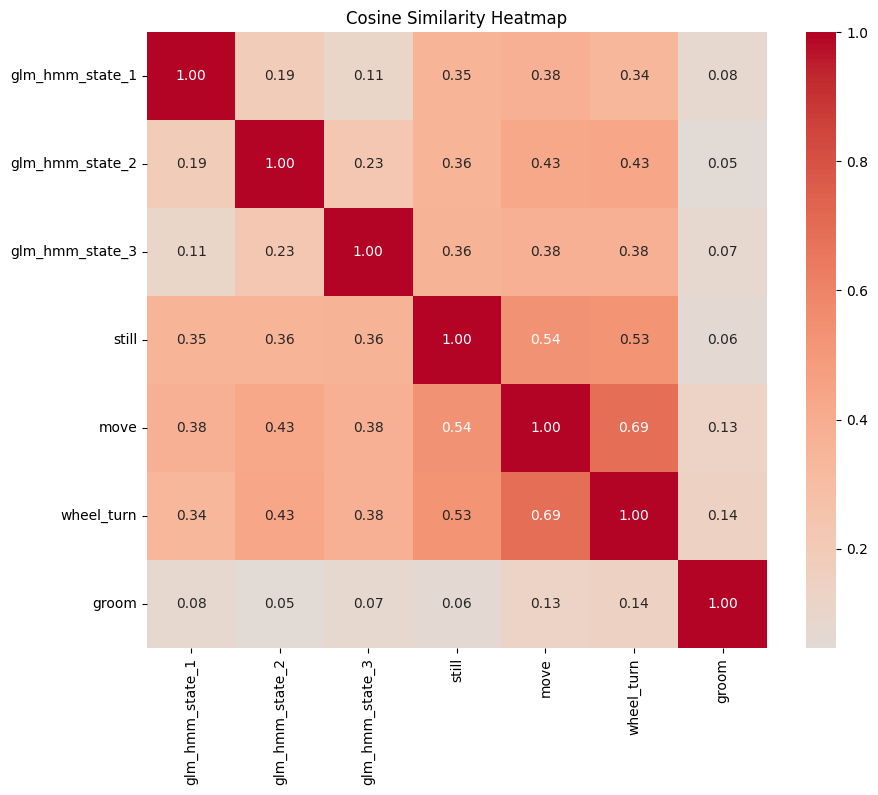

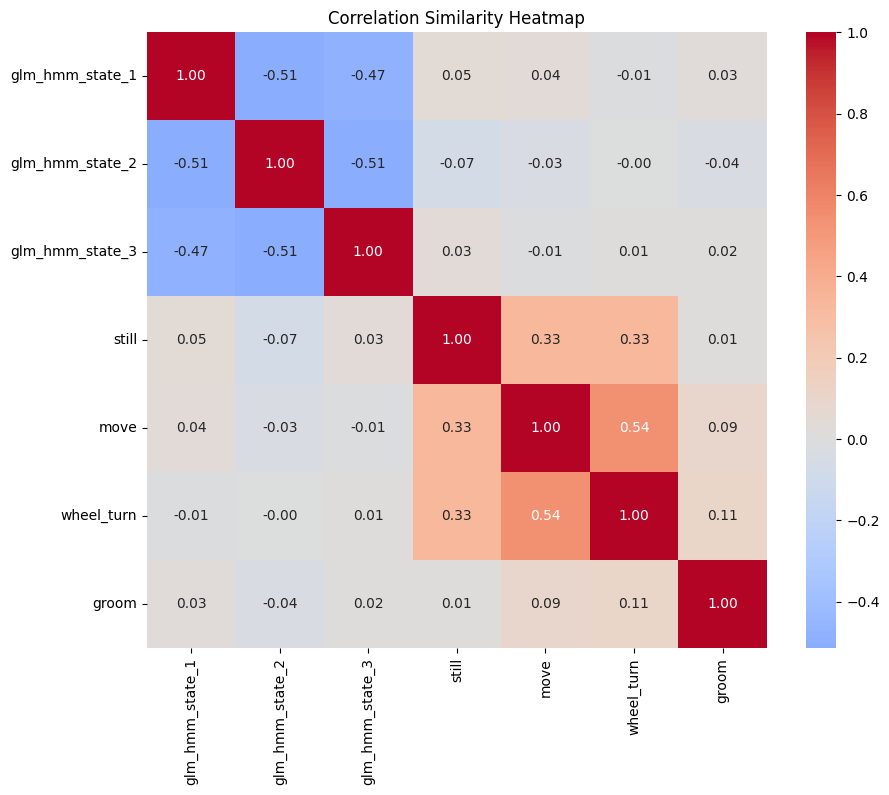

/home/rudra/miniconda3/envs/plab/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


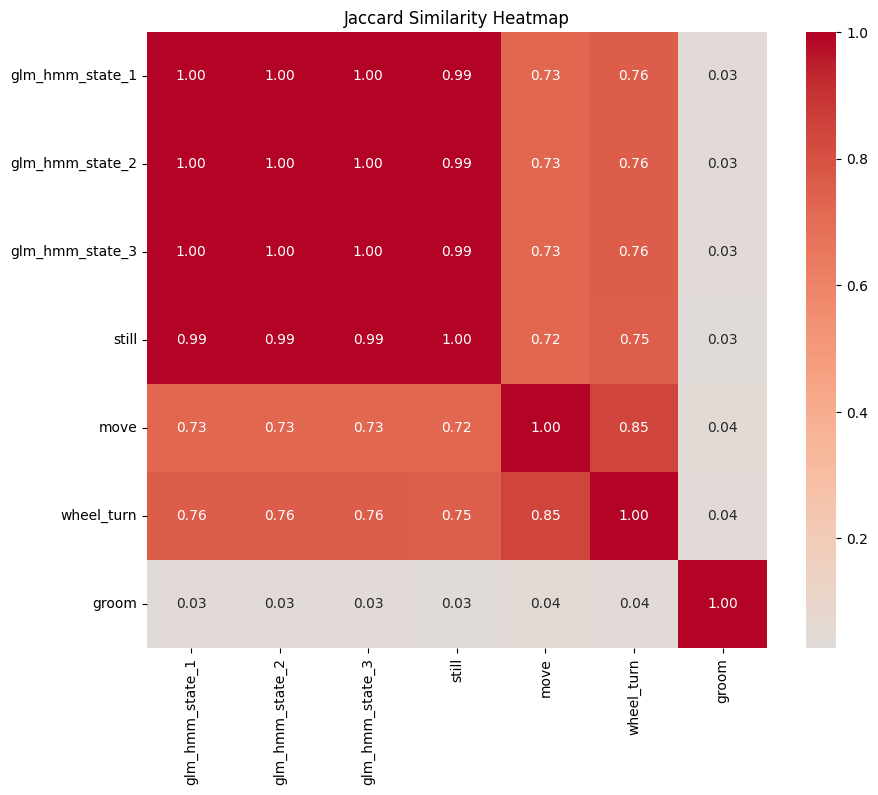

In [35]:
# Now do cosine similarity between the glm columns and count columns
from sklearn.metrics import pairwise_distances
metrics = ['cosine', 'correlation', 'jaccard']

for metric in metrics:
    # Calculate cosine similarity between glm columns and count columns
    cosine_sim = pairwise_distances(adf[glm_columns + count_columns].to_numpy().T, metric=metric)
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(1-cosine_sim, annot=True, cmap='coolwarm', fmt='.2f', center=0, xticklabels=glm_columns + count_columns, yticklabels=glm_columns + count_columns)
    plt.title(f'{metric.capitalize()} Similarity Heatmap')
    plt.show()


In [10]:
correlation_matrix

glm_hmm_state_1  glm_hmm_state_2  glm_hmm_state_3     still  \
glm_hmm_state_1         1.000000        -0.514010        -0.474263  0.046096   
glm_hmm_state_2        -0.514010         1.000000        -0.511403 -0.074540   
glm_hmm_state_3        -0.474263        -0.511403         1.000000  0.030324   
still                   0.046096        -0.074540         0.030324  1.000000   
move                    0.039615        -0.033009        -0.005808  0.329346   
wheel_turn             -0.011831        -0.002555         0.014475  0.326482   
groom                   0.025407        -0.039641         0.015232  0.012482   

                     move  wheel_turn     groom  
glm_hmm_state_1  0.039615   -0.011831  0.025407  
glm_hmm_state_2 -0.033009   -0.002555 -0.039641  
glm_hmm_state_3 -0.005808    0.014475  0.015232  
still            0.329346    0.326482  0.012482  
move             1.000000    0.540121  0.093397  
wheel_turn       0.540121    1.000000  0.105447  
groom            0.093397    0.105447  1.000000

In [69]:
adf

session trial_idx  glm_hmm_state_1  \
0   db4df448-e449-4a6f-a0e7-288711e7a75a         0     3.585359e-11   
0   db4df448-e449-4a6f-a0e7-288711e7a75a         1     1.557519e-04   
0   db4df448-e449-4a6f-a0e7-288711e7a75a         2     7.079793e-04   
0   db4df448-e449-4a6f-a0e7-288711e7a75a         3     1.196416e-03   
0   db4df448-e449-4a6f-a0e7-288711e7a75a         4     1.675768e-03   
..                                   ...       ...              ...   
0   3e6a97d3-3991-49e2-b346-6948cb4580fb       520     6.669030e-01   
0   3e6a97d3-3991-49e2-b346-6948cb4580fb       521     6.197505e-01   
0   3e6a97d3-3991-49e2-b346-6948cb4580fb       522     7.263608e-01   
0   3e6a97d3-3991-49e2-b346-6948cb4580fb       523     7.388124e-01   
0   3e6a97d3-3991-49e2-b346-6948cb4580fb       524     6.942724e-01   

    glm_hmm_state_2  glm_hmm_state_3  still  move  wheel_turn  groom  
0          0.985644         0.014356   1151   279         948      0  
0          0.990954         0.008890    261    31         145      0  
0          0.995434         0.003858    140     0         108      0  
0          0.996150         0.002653     76    55          84      0  
0          0.995913         0.002411     86     0         116      0  
..              ...              ...    ...   ...         ...    ...  
0          0.332919         0.000178     88   102         179      0  
0          0.379749         0.000501   1823    56         383     15  
0          0.273305         0.000334    451    22          88      0  
0          0.260548         0.000640   1288    22          18      0  
0          0.303384         0.002343    462     0           0      0  

[29023 rows x 9 columns]

/tmp/ipykernel_36443/2739330873.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 50)
/tmp/ipykernel_36443/2739330873.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 50)
/tmp/ipykernel_36443/2739330873.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 50)
/tmp/ipykernel_36443/2739330873.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 50)


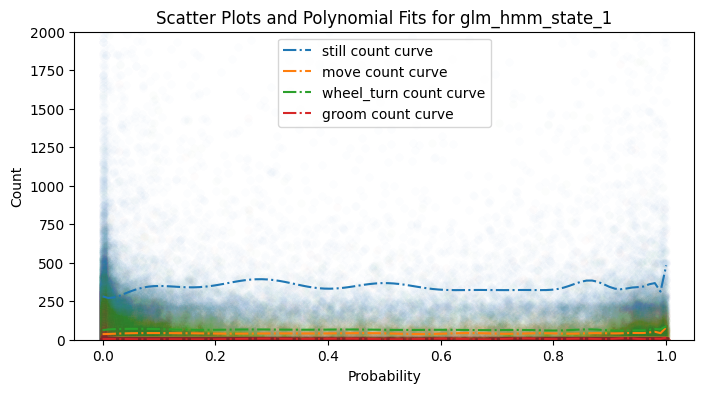

/tmp/ipykernel_36443/2739330873.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 50)
/tmp/ipykernel_36443/2739330873.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 50)
/tmp/ipykernel_36443/2739330873.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 50)
/tmp/ipykernel_36443/2739330873.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 50)


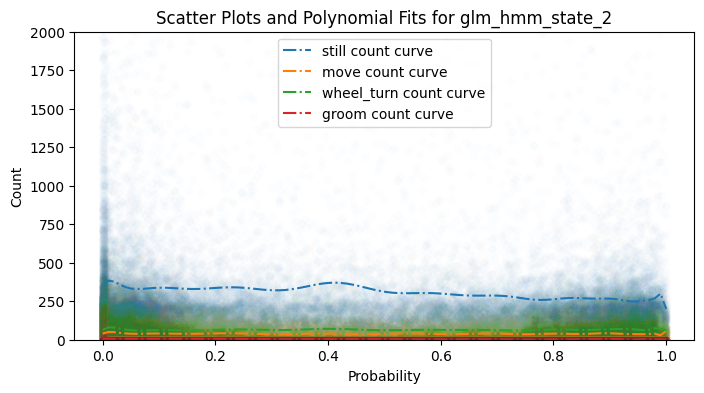

/tmp/ipykernel_36443/2739330873.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 50)
/tmp/ipykernel_36443/2739330873.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 50)
/tmp/ipykernel_36443/2739330873.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 50)
/tmp/ipykernel_36443/2739330873.py:23: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, 50)


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of glm columns and count columns
glm_columns = ['glm_hmm_state_1', 'glm_hmm_state_2', 'glm_hmm_state_3']
count_columns = ['still', 'move', 'wheel_turn', 'groom']

# Create plots for each glm column
for glm_col in glm_columns:
    plt.figure(figsize=(8, 4))
    
    # Scatter and fit line for each count column
    for count_col in count_columns:
        # Scatter plot with opacity
        sns.scatterplot(data=adf, x=glm_col, y=count_col, alpha=0.01)
        
        # Fit polynomial curve
        x = adf[glm_col]
        y = adf[count_col]
        
        # Fit a polynomial of degree 2 (quadratic) or adjust as needed
        coeffs = np.polyfit(x, y, 50)
        poly = np.poly1d(coeffs)
        x_fit = np.linspace(x.min(), x.max(), 100)
        y_fit = poly(x_fit)
        
        plt.plot(x_fit, y_fit, label=f'{count_col} count curve', linestyle='dashdot')
    
    plt.title(f'Scatter Plots and Polynomial Fits for {glm_col}')
    plt.xlabel('Probability')
    plt.ylabel('Count')
    plt.ylim(0,2000)
    plt.legend()
    plt.show()


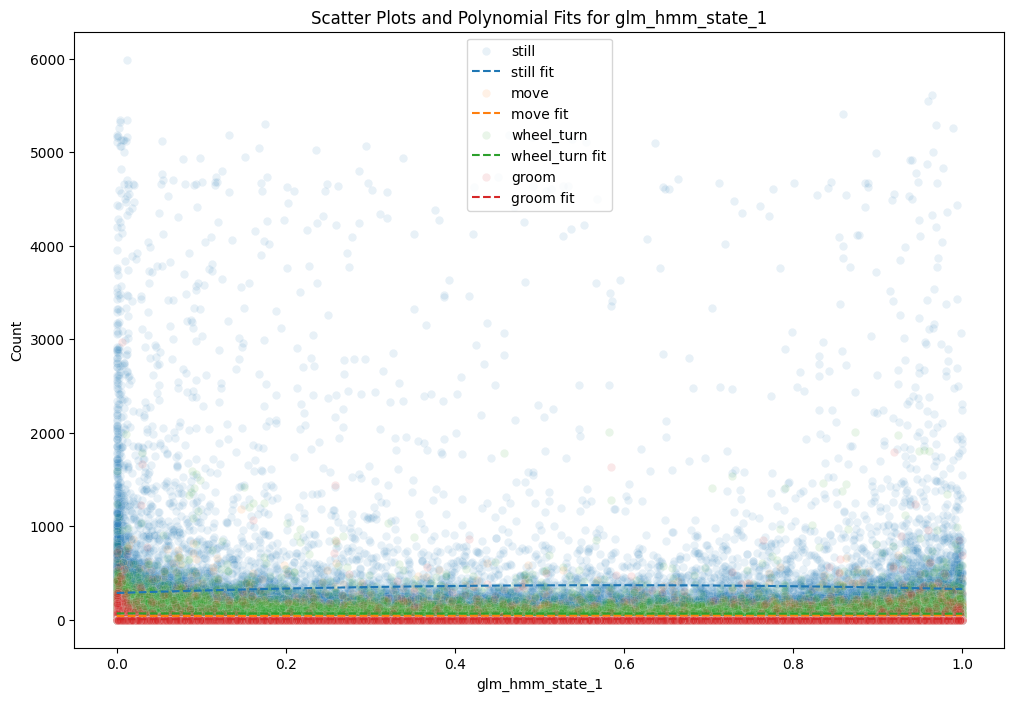

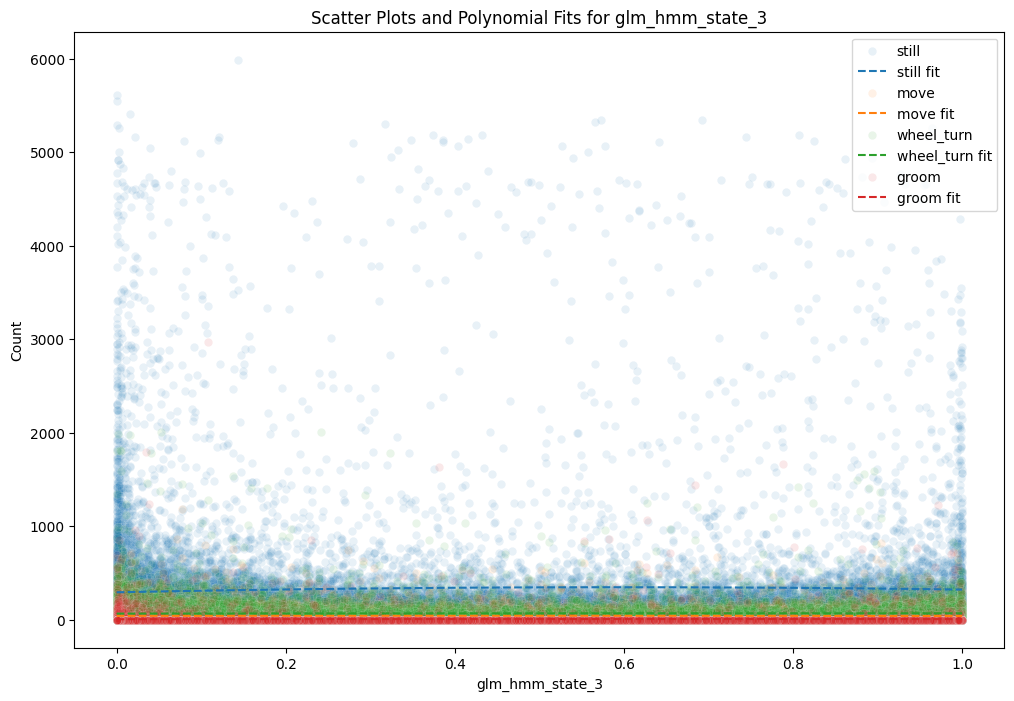

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of glm columns and count columns
glm_columns = ['glm_hmm_state_1', 'glm_hmm_state_2', 'glm_hmm_state_3']
count_columns = ['still', 'move', 'wheel_turn', 'groom']

# Create plots for each glm column
for glm_col in glm_columns:
    plt.figure(figsize=(12, 8))
    
    # Scatter and fit line for each count column
    for count_col in count_columns:
        # Scatter plot with opacity
        sns.scatterplot(data=adf, x=glm_col, y=count_col, alpha=0.1, label=count_col)
        
        # Fit polynomial curve
        x = adf[glm_col]
        y = adf[count_col]
        
        # Fit a polynomial of degree 2 (quadratic) or adjust as needed
        coeffs = np.polyfit(x, y, 2)
        poly = np.poly1d(coeffs)
        x_fit = np.linspace(x.min(), x.max(), 100)
        y_fit = poly(x_fit)
        
        plt.plot(x_fit, y_fit, label=f'{count_col} fit', linestyle='--')
    
    plt.title(f'Scatter Plots and Polynomial Fits for {glm_col}')
    plt.xlabel(glm_col)
    plt.ylabel('Count')
    plt.legend()
    plt.show()


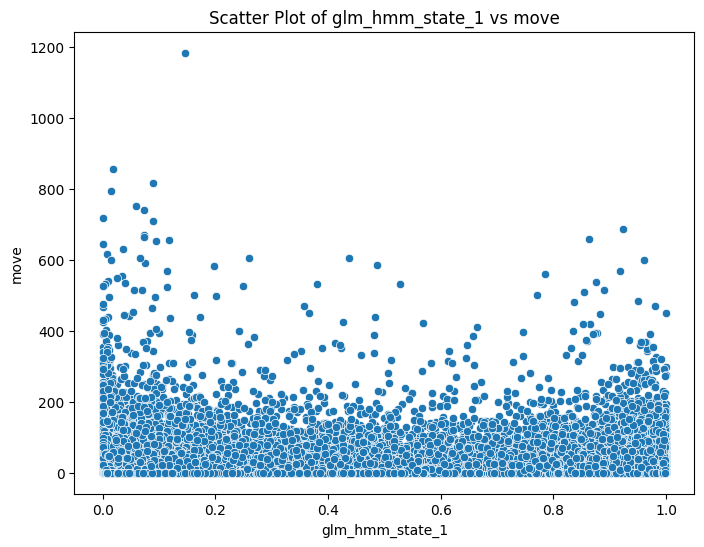

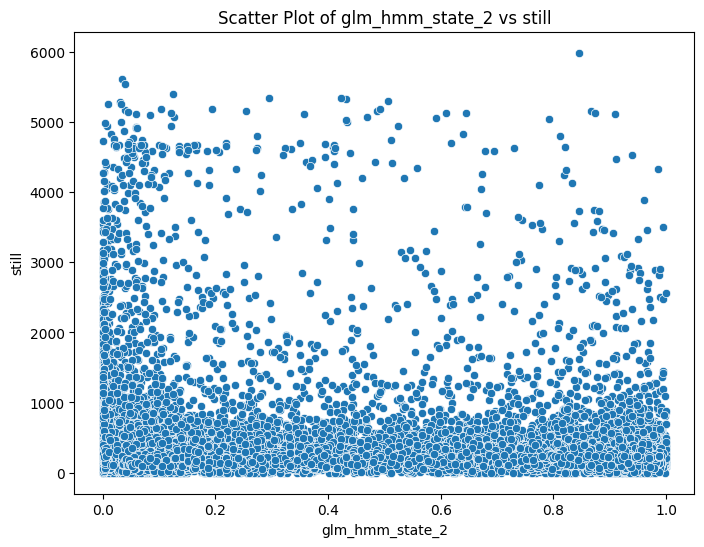

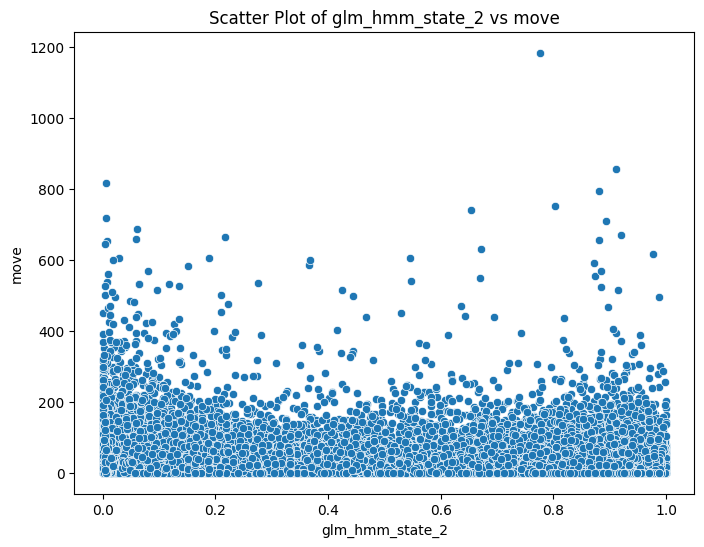

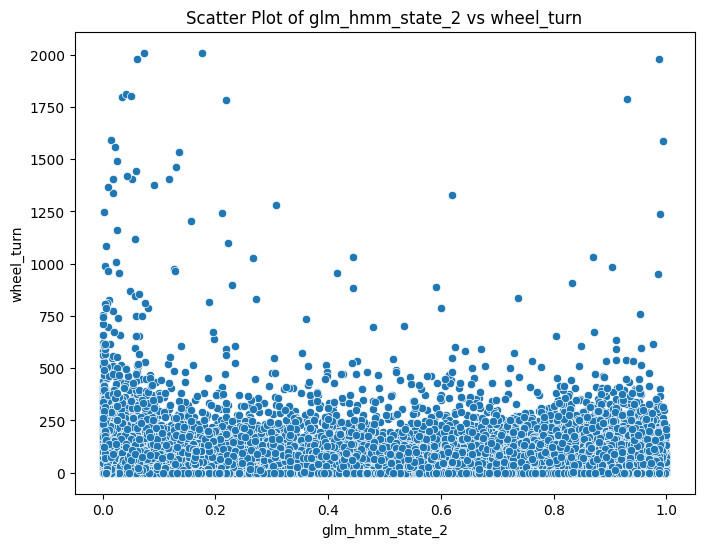

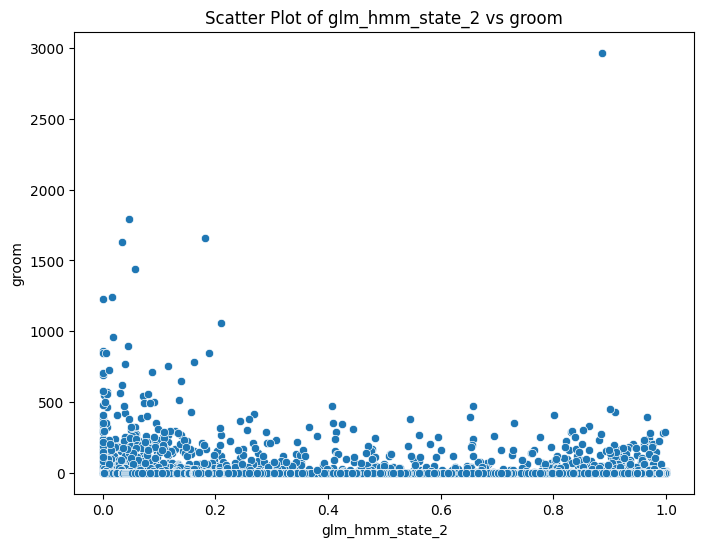

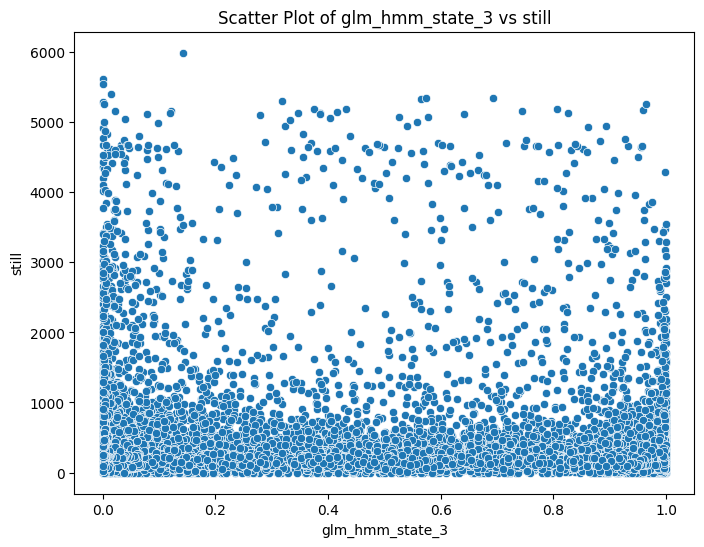

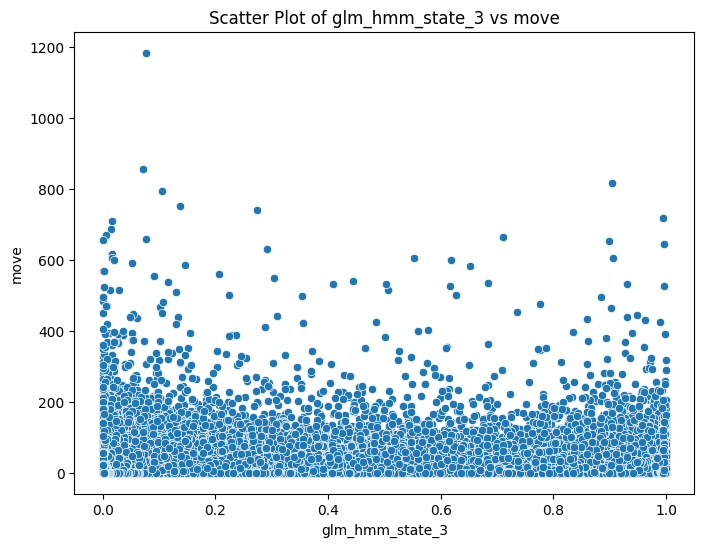

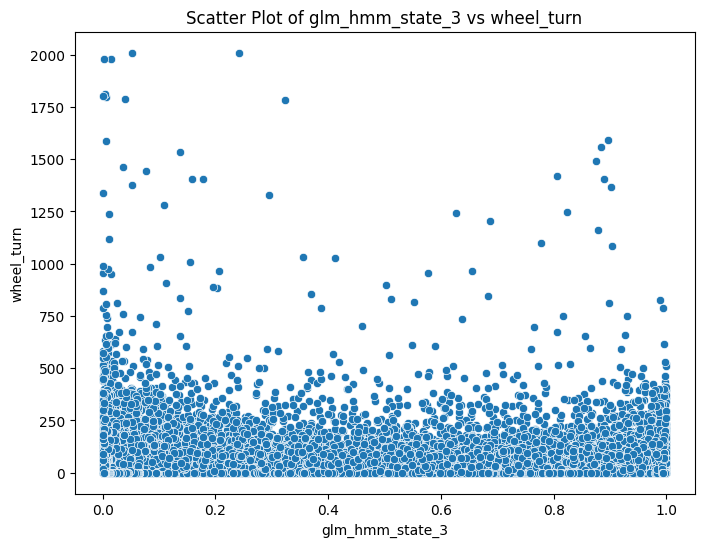

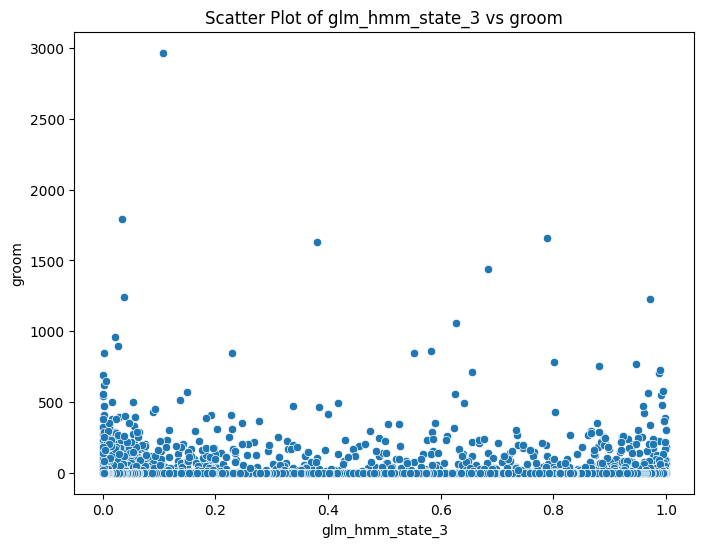

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of glm columns and count columns
glm_columns = ['glm_hmm_state_1', 'glm_hmm_state_2', 'glm_hmm_state_3']
count_columns = ['still', 'move', 'wheel_turn', 'groom']

# Create scatter plots for each combination of glm columns and count columns
for glm_col in glm_columns:
    for count_col in count_columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=adf, x=glm_col, y=count_col)
        plt.title(f'Scatter Plot of {glm_col} vs {count_col}')
        plt.xlabel(glm_col)
        plt.ylabel(count_col)
        plt.show()